Mounting google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Credit_risk.csv')

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
print(df.isna().sum())
print(df.duplicated().sum())
print(df.columns)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
165
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [8]:
df=df.drop_duplicates()
df.shape

(32416, 12)

In [9]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [10]:
print(df['person_emp_length'].value_counts())
print(df['loan_int_rate'].value_counts())

person_emp_length
0.0      4086
2.0      3832
3.0      3442
5.0      2926
1.0      2897
4.0      2863
6.0      2652
7.0      2186
8.0      1676
9.0      1359
11.0      735
10.0      692
12.0      571
13.0      426
14.0      334
15.0      238
16.0      165
17.0      128
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64
loan_int_rate
7.51     754
10.99    745
7.49     638
7.88     636
5.42     588
        ... 
21.64      1
17.46      1
21.14      1
20.48      1
20.53      1
Name: count, Length: 348, dtype: int64


data visualisation fucntions

In [16]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    ## Boxplot and histogram combined
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.set_style("whitegrid")
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.set_style("whitegrid")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [17]:
def labeled_barplot(data, feature, perc=False, n=None):

   ## Barplot with percentage at the top
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=11)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

visualising columns of the data

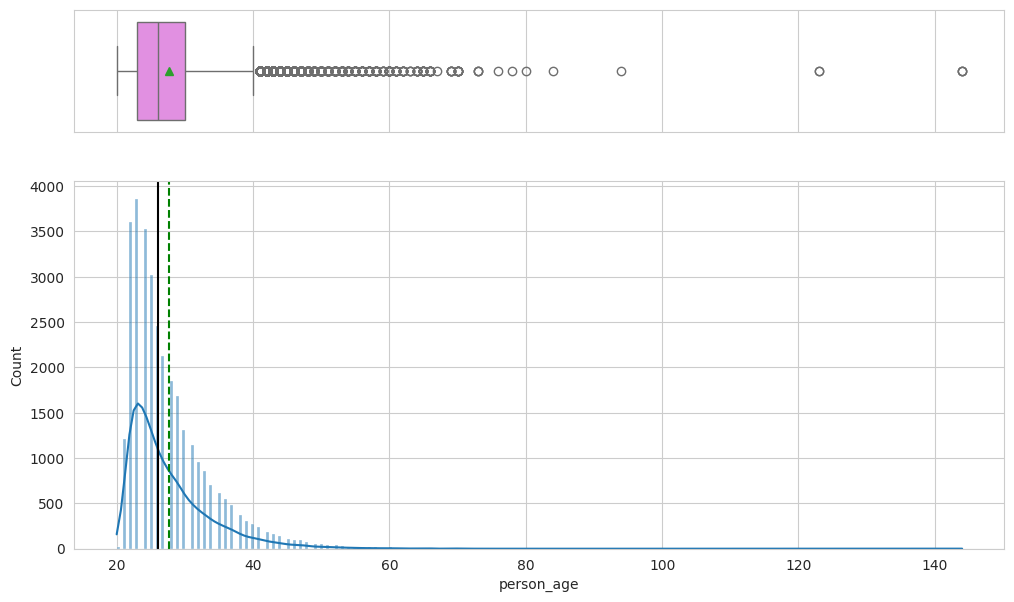

In [21]:
sns.set_style("whitegrid")
histogram_boxplot(df, "person_age", kde=True)

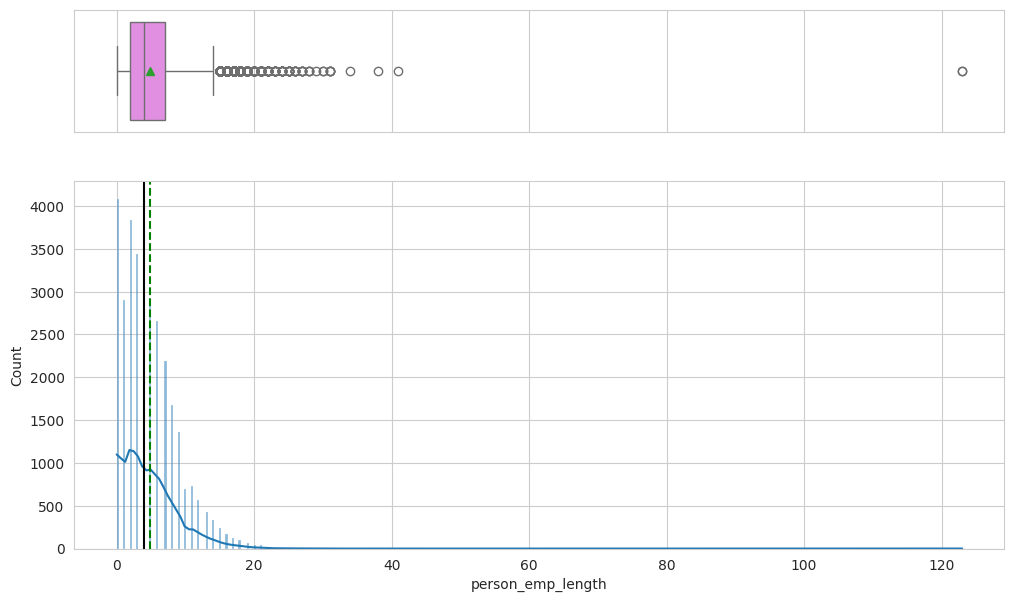

In [23]:
sns.set_style("whitegrid")
histogram_boxplot(df, "person_emp_length", kde=True)

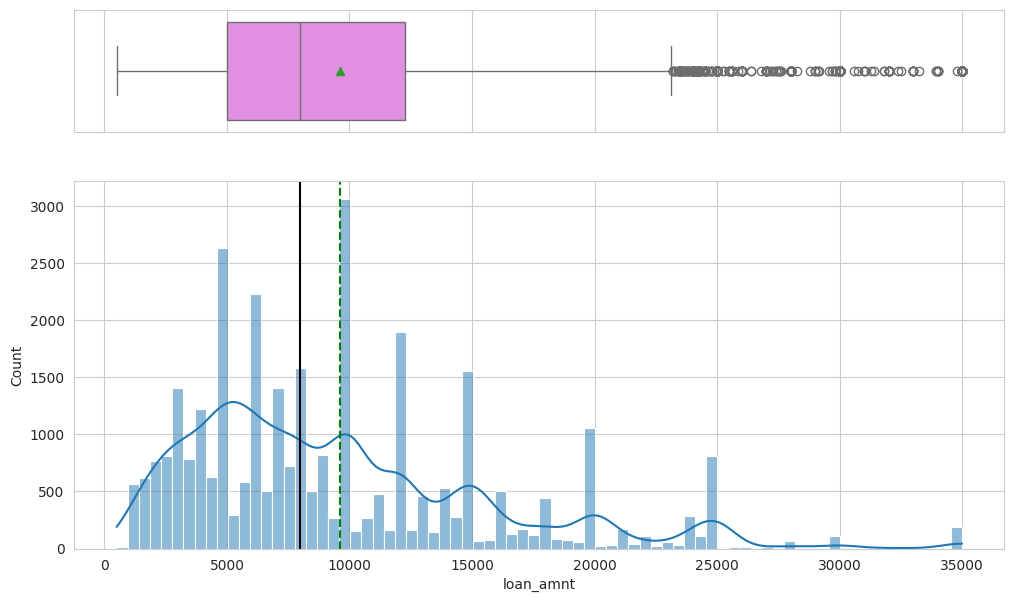

In [24]:
sns.set_style("whitegrid")
histogram_boxplot(df, "loan_amnt", kde=True)

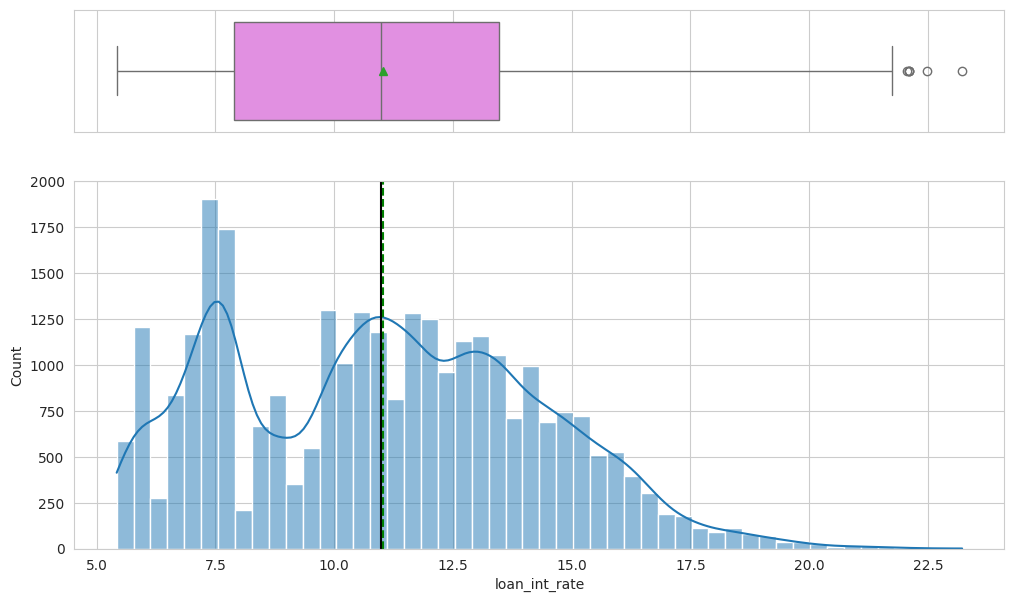

In [26]:
sns.set_style("whitegrid")
histogram_boxplot(df, "loan_int_rate", kde=True)

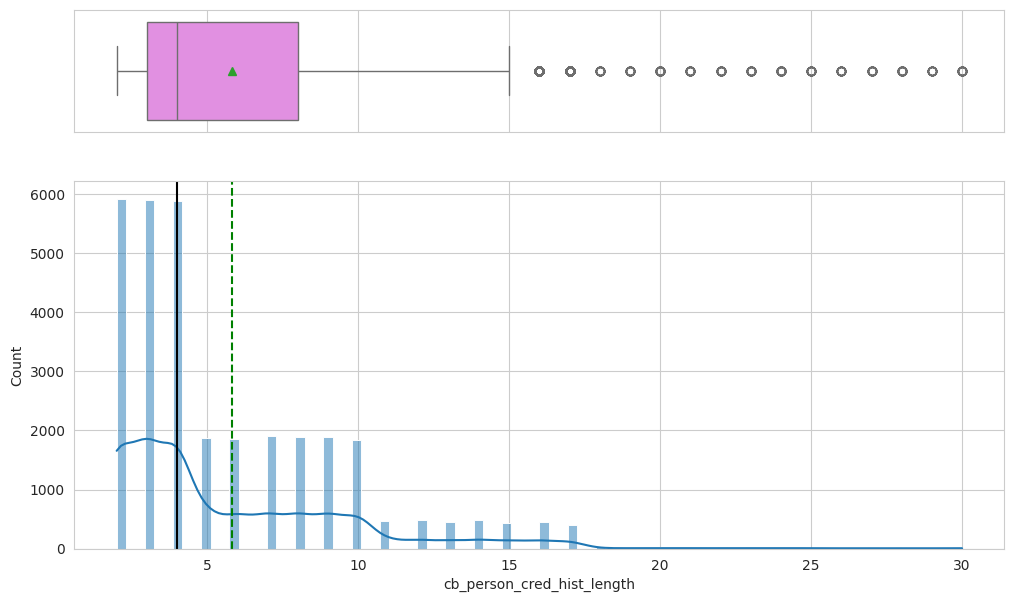

In [28]:
sns.set_style("whitegrid")
histogram_boxplot(df, "cb_person_cred_hist_length", kde=True)

<ipython-input-17-4ea07f783410>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


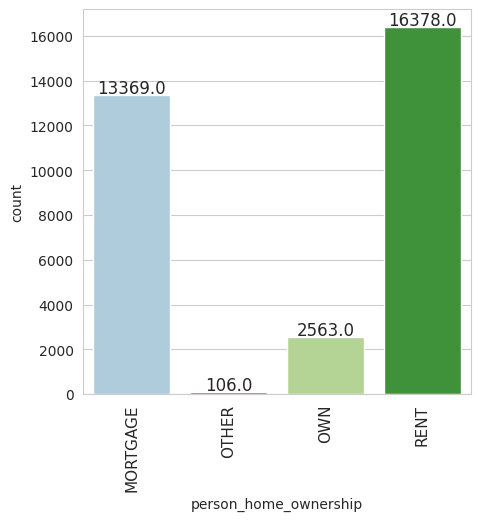

In [30]:
labeled_barplot(df, "person_home_ownership")

<ipython-input-17-4ea07f783410>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


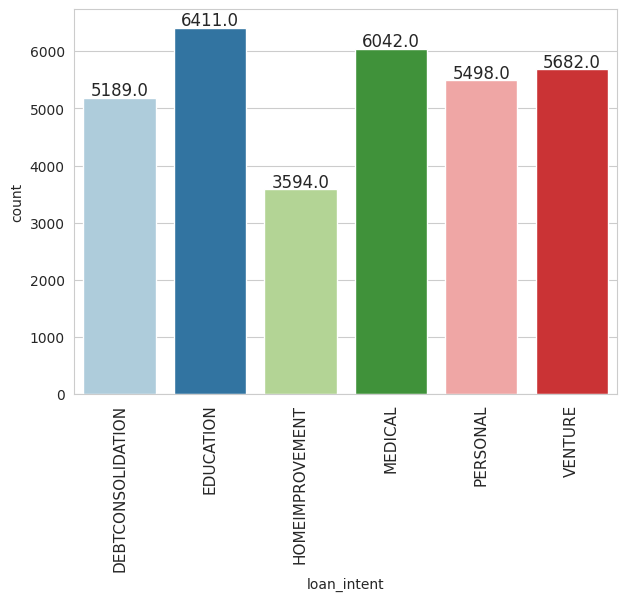

In [31]:
labeled_barplot(df, "loan_intent")

<ipython-input-17-4ea07f783410>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


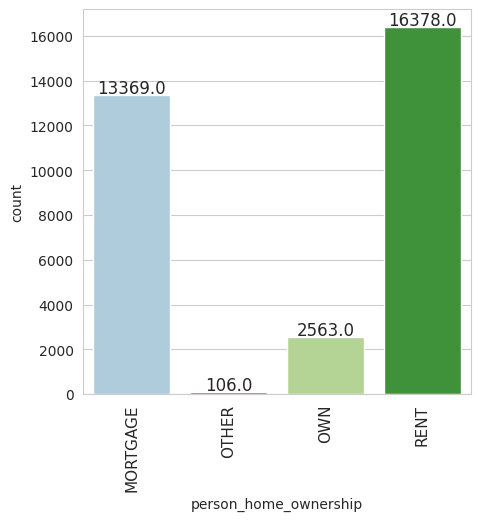

In [33]:
labeled_barplot(df, "person_home_ownership")

<ipython-input-17-4ea07f783410>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


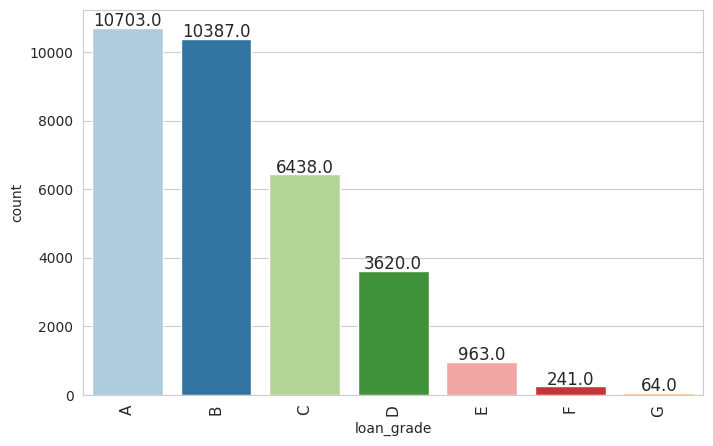

In [34]:
labeled_barplot(df, "loan_grade")

<ipython-input-17-4ea07f783410>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


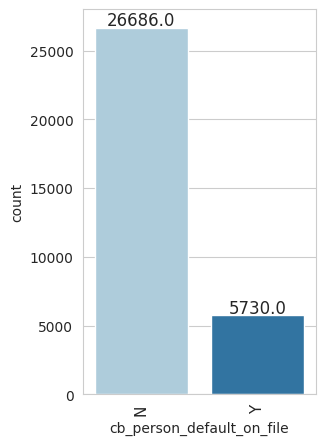

In [35]:
labeled_barplot(df, "cb_person_default_on_file")

<ipython-input-17-4ea07f783410>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


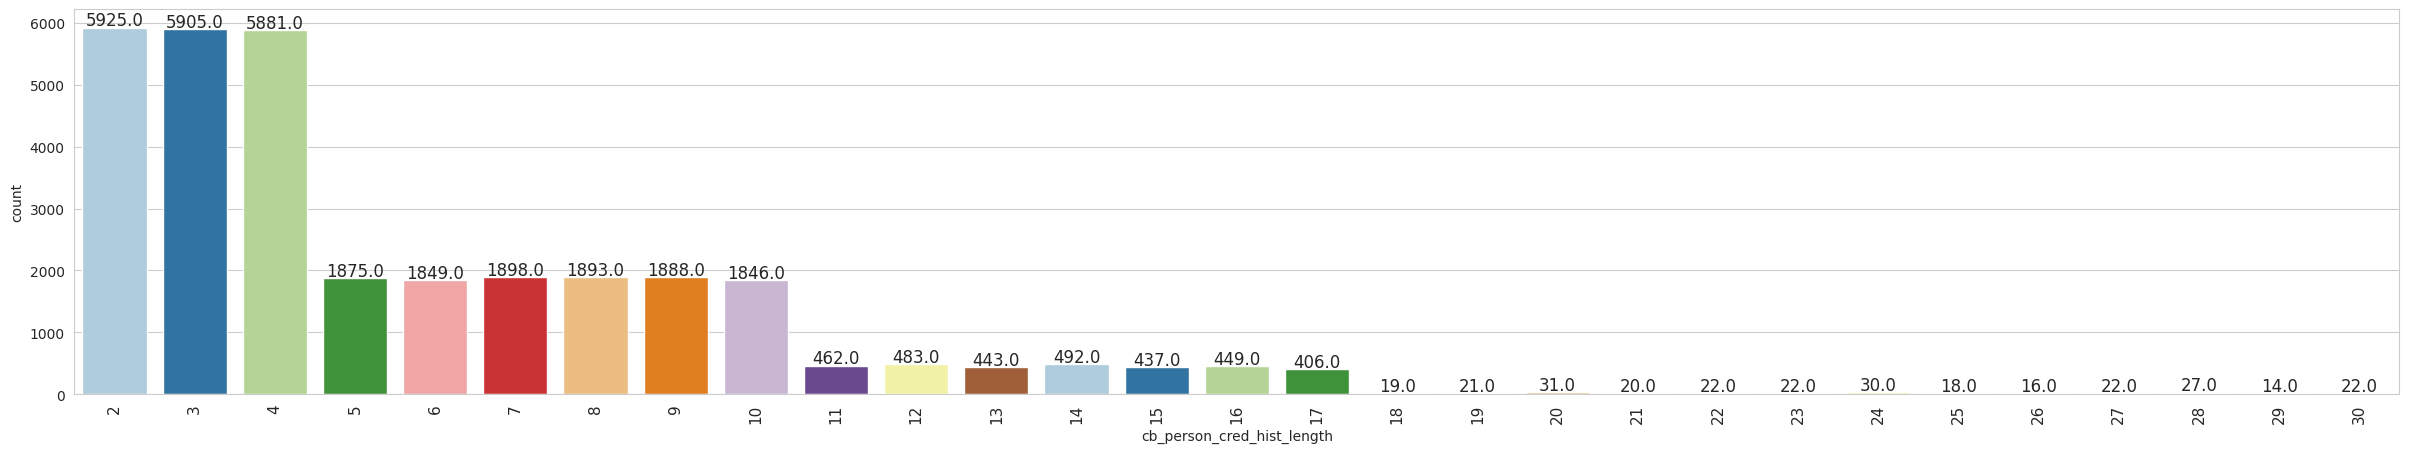

In [36]:
labeled_barplot(df, "cb_person_cred_hist_length")

dealing with null values

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [39]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].median())

In [41]:
df['loan_int_rate'].isna().sum()

3095

bivariate visualisation before filling null values - one hot encoding temporarily for that

In [42]:
numcols = ['person_age', 'person_income',
       'person_emp_length',   'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
        'cb_person_cred_hist_length']

In [43]:
credit_df=df.copy()

In [44]:
replaceStruct = {
                "cb_person_default_on_file":     {"N": 0, "Y": 1 },
                "loan_grade": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7},
                "loan_intent": {"EDUCATION": 1, "MEDICAL": 2, "VENTURE": 3, "PERSONAL": 4, "DEBTCONSOLIDATION": 5, "HOMEIMPROVEMENT": 6},
                "person_home_ownership": {"RENT": 1, "MORTGAGE": 2, "OWN": 3, "OTHER":4},

                    }

oneHotCols=["cb_person_default_on_file","loan_grade","loan_intent","person_home_ownership"]
credit_df=credit_df.replace(replaceStruct)
credit_df=pd.get_dummies(credit_df, columns=oneHotCols, drop_first=True)
credit_df.head(10)

<ipython-input-44-a84bc5dfb760>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit_df=credit_df.replace(replaceStruct)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_1,loan_grade_2,...,loan_grade_6,loan_grade_7,loan_intent_2,loan_intent_3,loan_intent_4,loan_intent_5,loan_intent_6,person_home_ownership_2,person_home_ownership_3,person_home_ownership_4
0,22,59000,123.0,35000,16.02,1,0.59,3,True,False,...,False,False,False,False,True,False,False,False,False,False
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,False,False,True,False,False,False,False,True,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,True,False,False,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,True,False,...,False,False,True,False,False,False,False,False,False,False
5,21,9900,2.0,2500,7.14,1,0.25,2,False,False,...,False,False,False,True,False,False,False,False,True,False
6,26,77100,8.0,35000,12.42,1,0.45,3,False,True,...,False,False,False,False,False,False,False,False,False,False
7,24,78956,5.0,35000,11.11,1,0.44,4,False,True,...,False,False,True,False,False,False,False,False,False,False
8,24,83000,8.0,35000,8.90,1,0.42,2,False,False,...,False,False,False,False,True,False,False,False,False,False
9,21,10000,6.0,1600,14.74,1,0.16,3,False,False,...,False,False,False,True,False,False,False,False,True,False


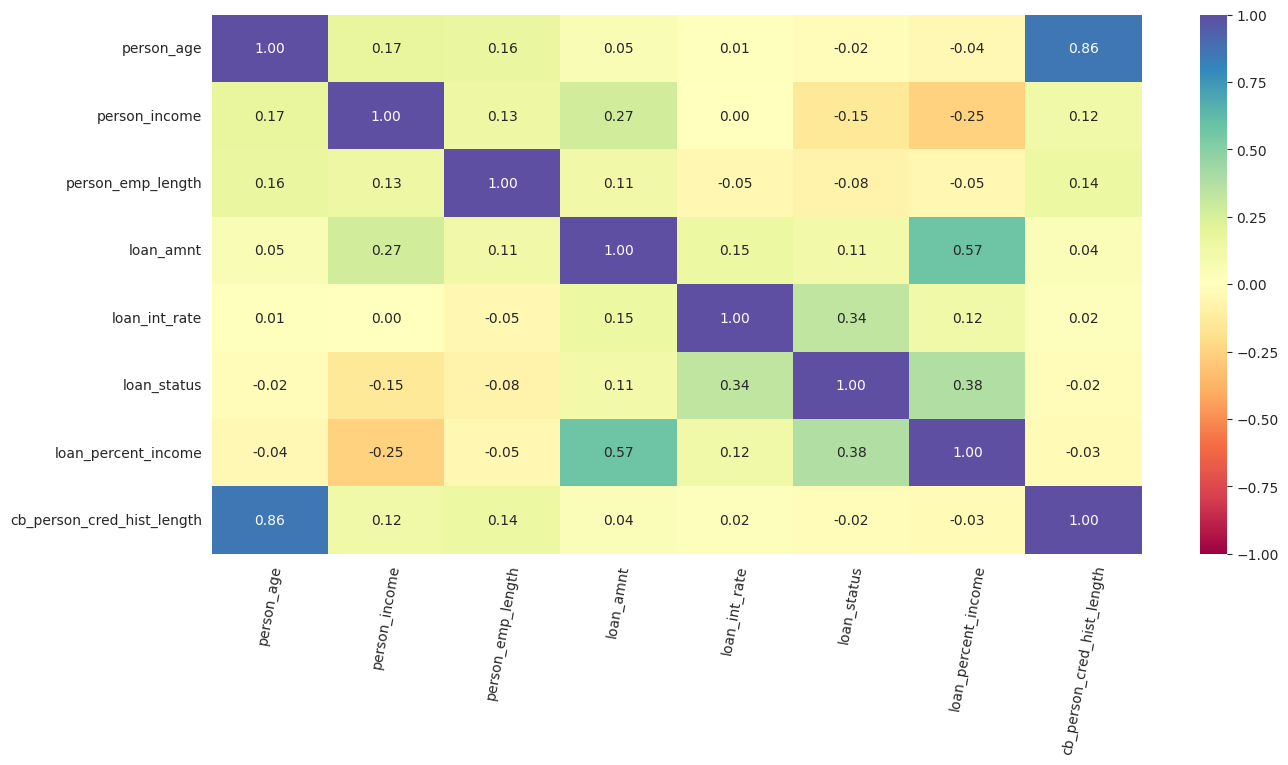

In [45]:
plt.figure(figsize=(15, 7))
sns.heatmap(credit_df[numcols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.xticks(rotation = 80)
plt.show()

In [48]:
credit_df=credit_df.drop(['person_age','loan_percent_income'],axis=1)

In [49]:
credit_df.describe()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length
count,3.241600e+04,32416.000000,32416.000000,29321.000000,32416.000000,32416.000000
mean,6.609164e+04,4.768880,9593.845632,11.017265,0.218688,5.811297
std,6.201558e+04,4.090411,6322.730241,3.241680,0.413363,4.059030
min,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,3.854200e+04,2.000000,5000.000000,7.900000,0.000000,3.000000
50%,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,4.000000
75%,7.921800e+04,7.000000,12250.000000,13.470000,0.000000,8.000000
max,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,30.000000


In [50]:
def cap_outliers(df, column):
    """Caps outliers in a specified column of a DataFrame.

    Args:
        df: The input DataFrame.
        column: The name of the column to cap outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.clip(df[column], lower_bound, upper_bound)

cap_outliers(credit_df, 'loan_int_rate')

In [51]:
credit_df['loan_int_rate']=credit_df['loan_int_rate'].fillna(credit_df['loan_int_rate'].median())

In [52]:
credit_df.isna().sum()

,0
person_income,0
person_emp_length,0
loan_amnt,0
loan_int_rate,0
loan_status,0
cb_person_cred_hist_length,0
cb_person_default_on_file_1,0
loan_grade_2,0
loan_grade_3,0
loan_grade_4,0


In [53]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_income                32416 non-null  int64  
 1   person_emp_length            32416 non-null  float64
 2   loan_amnt                    32416 non-null  int64  
 3   loan_int_rate                32416 non-null  float64
 4   loan_status                  32416 non-null  int64  
 5   cb_person_cred_hist_length   32416 non-null  int64  
 6   cb_person_default_on_file_1  32416 non-null  bool   
 7   loan_grade_2                 32416 non-null  bool   
 8   loan_grade_3                 32416 non-null  bool   
 9   loan_grade_4                 32416 non-null  bool   
 10  loan_grade_5                 32416 non-null  bool   
 11  loan_grade_6                 32416 non-null  bool   
 12  loan_grade_7                 32416 non-null  bool   
 13  loan_intent_2        

In [54]:
for col in credit_df.select_dtypes(include=['bool']).columns:
    print(f"Value counts for column '{col}':")
    print(credit_df[col].value_counts())
    print("-" * 20)

Value counts for column 'cb_person_default_on_file_1':
cb_person_default_on_file_1
False    26686
True      5730
Name: count, dtype: int64
--------------------
Value counts for column 'loan_grade_2':
loan_grade_2
False    22029
True     10387
Name: count, dtype: int64
--------------------
Value counts for column 'loan_grade_3':
loan_grade_3
False    25978
True      6438
Name: count, dtype: int64
--------------------
Value counts for column 'loan_grade_4':
loan_grade_4
False    28796
True      3620
Name: count, dtype: int64
--------------------
Value counts for column 'loan_grade_5':
loan_grade_5
False    31453
True       963
Name: count, dtype: int64
--------------------
Value counts for column 'loan_grade_6':
loan_grade_6
False    32175
True       241
Name: count, dtype: int64
--------------------
Value counts for column 'loan_grade_7':
loan_grade_7
False    32352
True        64
Name: count, dtype: int64
--------------------
Value counts for column 'loan_intent_2':
loan_intent_2
False

In [55]:
for col in credit_df.select_dtypes(include=['bool']).columns:
    credit_df[col] = credit_df[col].astype(int)

Normalisation

In [56]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_income                32416 non-null  int64  
 1   person_emp_length            32416 non-null  float64
 2   loan_amnt                    32416 non-null  int64  
 3   loan_int_rate                32416 non-null  float64
 4   loan_status                  32416 non-null  int64  
 5   cb_person_cred_hist_length   32416 non-null  int64  
 6   cb_person_default_on_file_1  32416 non-null  int64  
 7   loan_grade_2                 32416 non-null  int64  
 8   loan_grade_3                 32416 non-null  int64  
 9   loan_grade_4                 32416 non-null  int64  
 10  loan_grade_5                 32416 non-null  int64  
 11  loan_grade_6                 32416 non-null  int64  
 12  loan_grade_7                 32416 non-null  int64  
 13  loan_intent_2        

In [59]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['person_income', 'person_emp_length', 'loan_amnt',
                  'loan_int_rate', 'cb_person_cred_hist_length']
scaler = MinMaxScaler()
credit_df[numerical_cols] = scaler.fit_transform(credit_df[numerical_cols])
print(credit_df.head())

   person_income  person_emp_length  loan_amnt  loan_int_rate  loan_status  \
0       0.009173           1.000000   1.000000       0.646144            1   
1       0.000934           0.040650   0.014493       0.348674            0   
2       0.000934           0.008130   0.144928       0.454130            1   
3       0.010257           0.032520   1.000000       0.597988            1   
4       0.008406           0.065041   1.000000       0.539470            1   

   cb_person_cred_hist_length  cb_person_default_on_file_1  loan_grade_2  \
0                    0.035714                            1             0   
1                    0.000000                            0             1   
2                    0.035714                            0             0   
3                    0.000000                            0             0   
4                    0.071429                            1             0   

   loan_grade_3  loan_grade_4  ...  loan_grade_6  loan_grade_7  loan_inten

In [60]:
credit_df.describe()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length,cb_person_default_on_file_1,loan_grade_2,loan_grade_3,loan_grade_4,...,loan_grade_6,loan_grade_7,loan_intent_2,loan_intent_3,loan_intent_4,loan_intent_5,loan_intent_6,person_home_ownership_2,person_home_ownership_3,person_home_ownership_4
count,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,...,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,0.010356,0.038771,0.263590,0.341028,0.218688,0.136118,0.176765,0.320428,0.198606,0.111673,...,0.007435,0.001974,0.186389,0.175284,0.169608,0.160075,0.110871,0.412420,0.079066,0.003270
std,0.010343,0.033255,0.183268,0.187912,0.413363,0.144965,0.381475,0.466648,0.398957,0.314969,...,0.085904,0.044390,0.389427,0.380216,0.375293,0.366682,0.313977,0.492278,0.269846,0.057091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005761,0.016260,0.130435,0.187138,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.008506,0.032520,0.217391,0.339531,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.012545,0.056911,0.340580,0.468760,0.000000,0.214286,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


splitting the datset

In [64]:
X=credit_df.drop('loan_status',axis=1)
y=credit_df['loan_status']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=.20, random_state=1,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=.25, random_state=1,stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(25932, 20) (1621, 20) (4863, 20)


In [67]:
X_train.head(5)

,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,cb_person_default_on_file_1,loan_grade_2,loan_grade_3,loan_grade_4,loan_grade_5,loan_grade_6,loan_grade_7,loan_intent_2,loan_intent_3,loan_intent_4,loan_intent_5,loan_intent_6,person_home_ownership_2,person_home_ownership_3,person_home_ownership_4
32566,0.004336,0.04878,0.130435,0.445596,0.571429,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
13071,0.013934,0.04065,0.089855,0.392563,0.071429,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8316,0.008839,0.04878,0.492754,0.528497,0.035714,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
30705,0.011674,0.00000,0.217391,0.699177,0.464286,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
133,0.007672,0.02439,0.710145,0.415117,0.035714,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


oversampling model creation - random forest

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = rf_classifier.predict(X_val)


print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1266
           1       0.80      0.78      0.79       355

    accuracy                           0.91      1621
   macro avg       0.87      0.86      0.87      1621
weighted avg       0.91      0.91      0.91      1621

[[1199   67]
 [  79  276]]


oversampled xgboost

In [69]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_classifier.predict(X_val)

print(classification_report(y_val, y_pred_xgb))
print(confusion_matrix(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1266
           1       0.91      0.78      0.84       355

    accuracy                           0.94      1621
   macro avg       0.93      0.88      0.90      1621
weighted avg       0.93      0.94      0.93      1621

[[1239   27]
 [  77  278]]
